In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

current_dir = os.path.abspath(os.getcwd())
parent_dir = os.path.dirname(current_dir)
sys.path.append(os.path.join(parent_dir, 'scripts'))
import visualisation

# Milestone 1

In [23]:
data_1=pd.read_csv('../data/derivatives/dataframe.csv')

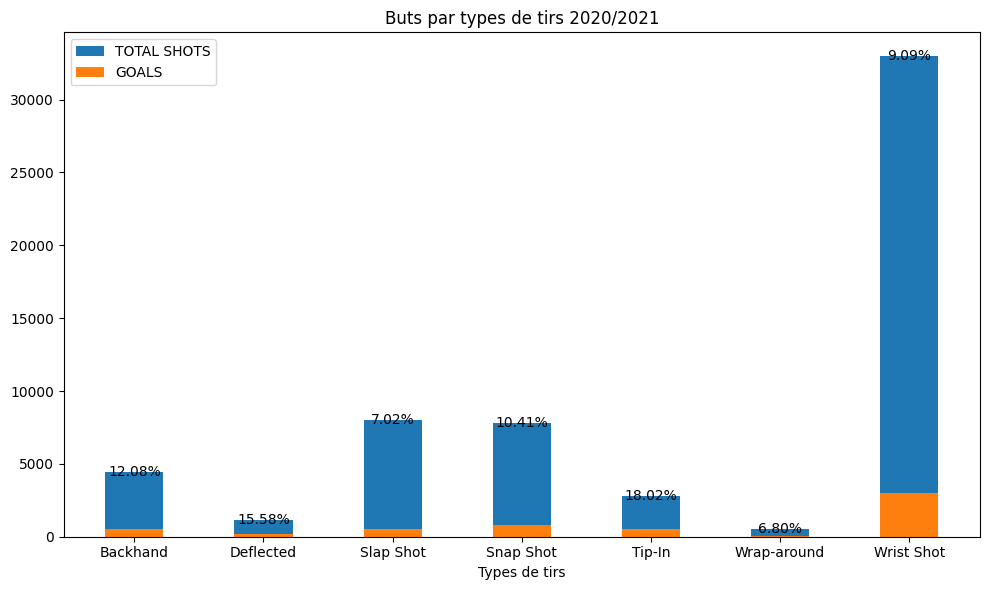

In [7]:
visualisation.shots_goals(data_1, 2020, log=False)

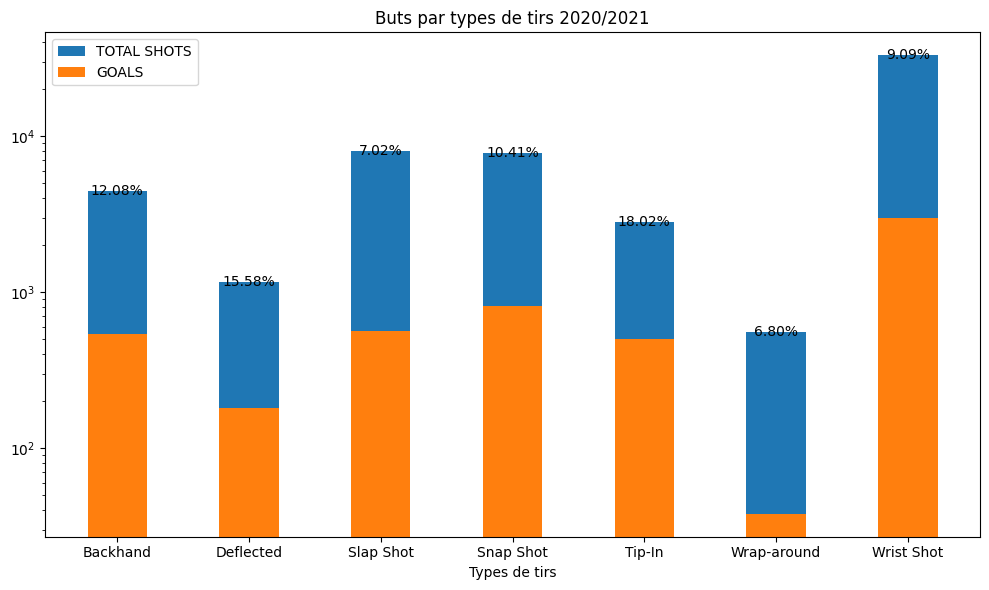

In [8]:
visualisation.shots_goals(data_1, 2020, log=True)

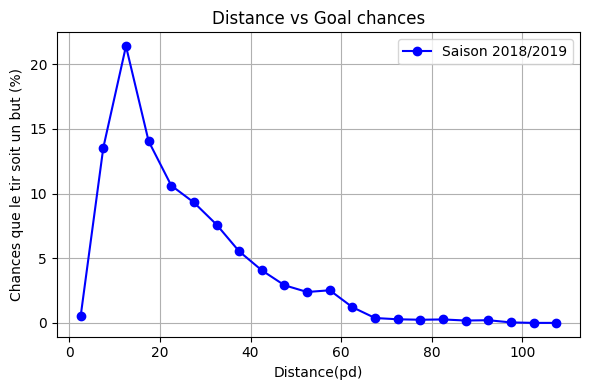

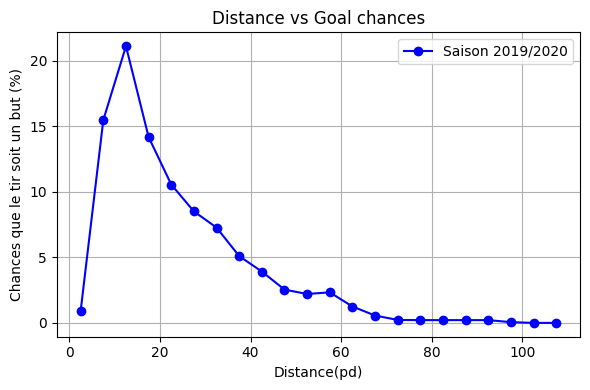

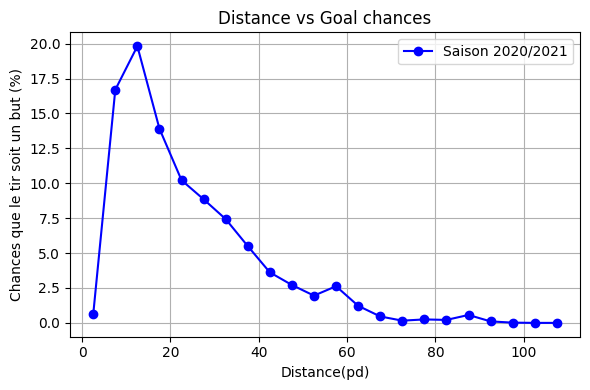

In [9]:
visualisation.Distance_goals(data_1, 2018)
visualisation.Distance_goals(data_1, 2019)
visualisation.Distance_goals(data_1, 2020)

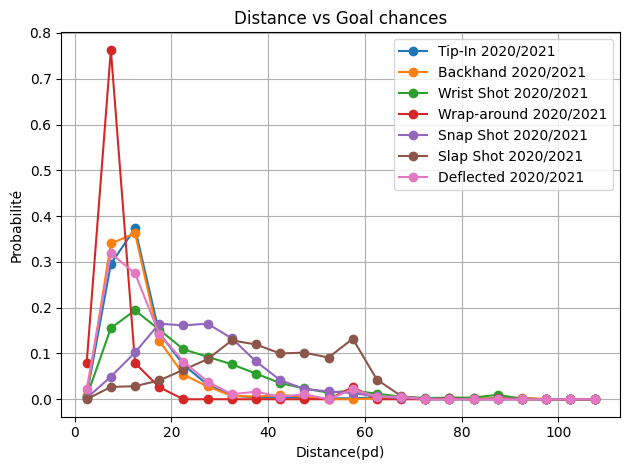

In [10]:
visualisation.Distance_goals_shots(data_1, 2020)

## dt contient tout les coordonnées ramenées à la zone offensive

In [26]:
data_2 = visualisation.Offensive_coords(data_1)

## les lignes contenant les valeurs aberrantes :

In [12]:
dt_f=data_2[data_2['new_x']>=0]

## Taux de tir moyen par heure de la ligue par emplacement

In [13]:
Ligue = visualisation.Taux_ligue(dt_f, 2020)

In [14]:
team = visualisation.Taux_team(dt_f, 'Colorado Avalanche', 2020)
result = []

for i in range(len(team)):
    sublist_result = [team[i][j] - Ligue[i][j] for j in range(len(team[i]))]
    result.append(sublist_result)

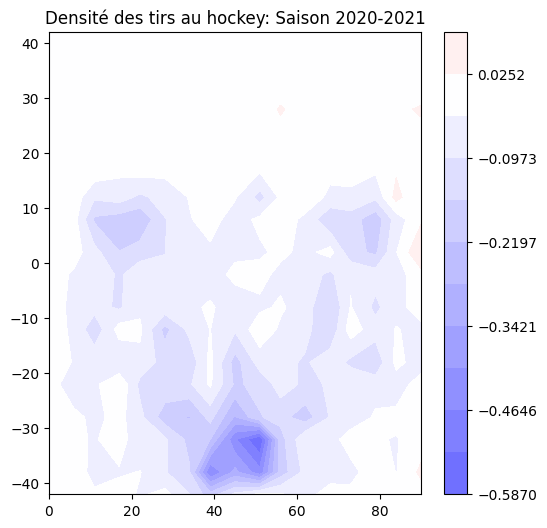

In [15]:
import matplotlib.colors as mcolors

# Charger l'image du terrain de hockey
im = plt.imread('../figures/zone_offensive.png')

fig, ax = plt.subplots(figsize=(6, 6))

width_rink = 42.5
height_rink = 90


#ax.imshow(im, extent=[0, 42.5, 100, 0])

[x,y] = np.round(np.meshgrid(np.linspace(0,90,17),np.linspace(-42.5,42.5,18)))

ax = ax.contourf(x,y,result,alpha = 1, cmap='bwr', 
        levels = np.linspace(np.min(result),np.max(result),12),
        vmin=-1,
        vmax=1,
            )


fig.colorbar(ax, orientation="vertical",pad = 0.05)
plt.title('Densité des tirs au hockey: Saison 2020-2021')
fig.savefig('/home/user/Documents/DataScience/blogpost-ift6758/assets/images/visu/avalanche_2020_2021.png')
plt.show()

# Milestone 2

In [2]:
data2 = pd.read_csv("../data/derivatives/features_train1.csv")

## Ingénierie des caractéristiques I

### Histogramme du nombre de tirs selon la distance du filet

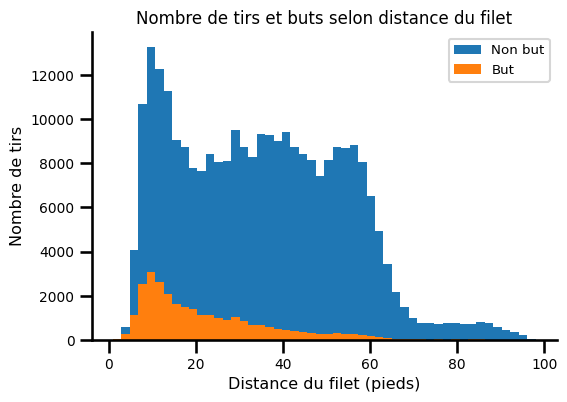

In [3]:
visualisation.hist_shots_goals_feature(data2, 'distance_goal', None, True)

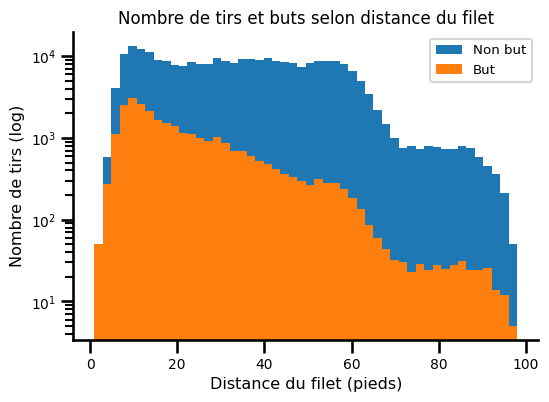

In [4]:
visualisation.hist_shots_goals_feature(data2, 'distance_goal', 'log', True)

### Histogramme du nombre de tirs selon l'angle du filet

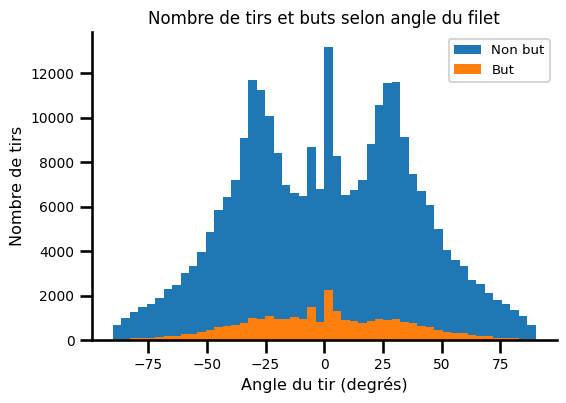

In [5]:
visualisation.hist_shots_goals_feature(data2, 'angle_goal', None, True)

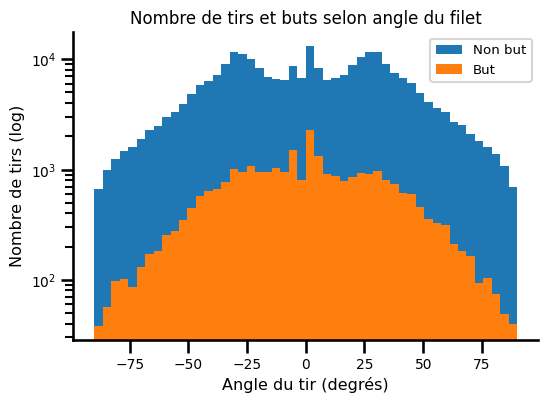

In [6]:
visualisation.hist_shots_goals_feature(data2, 'angle_goal', 'log', True)

### Taux de buts selon la distance du filet

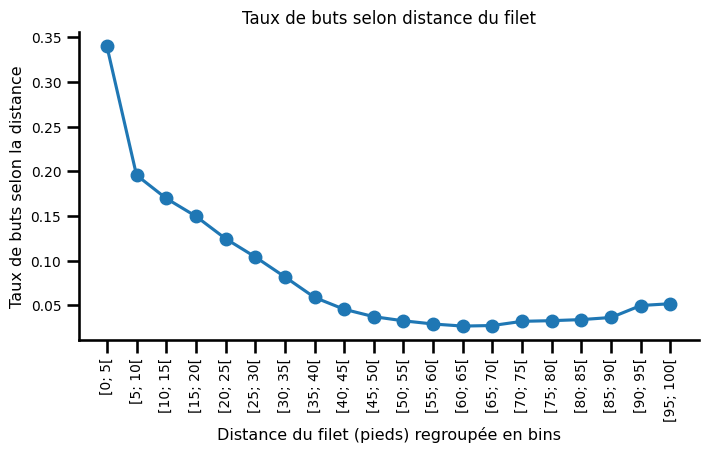

In [7]:
visualisation.goal_rate(data2, 'distance_goal', 0, 101, 5, True)

### Taux de buts selon l'angle de tir

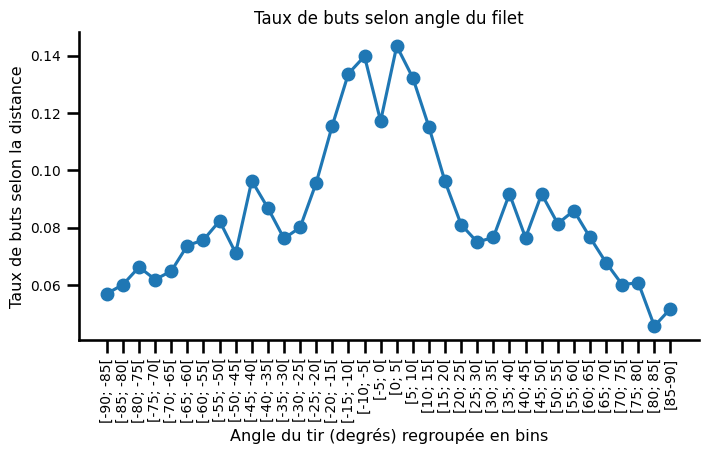

In [8]:
visualisation.goal_rate(data2, 'angle_goal', -90, 90, 5, True)

### Histogramme du nombre de buts selon la distance du filet (vide ou non-vide)

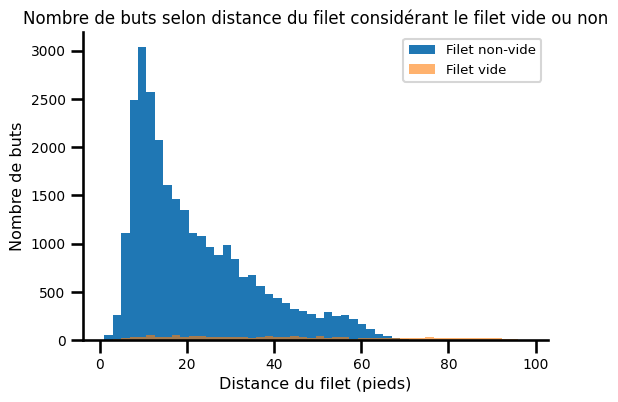

In [9]:
visualisation.hist_goals_dist(data2, None, True)

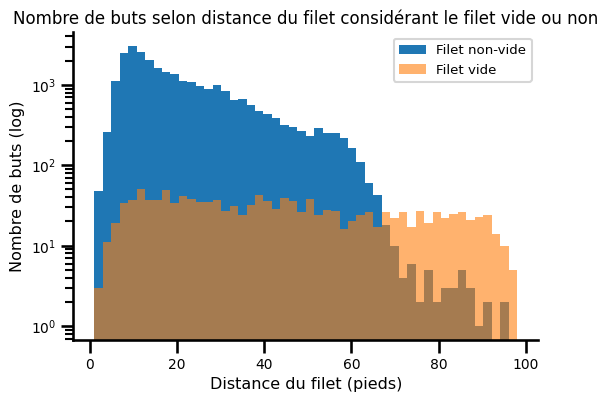

In [10]:
visualisation.hist_goals_dist(data2, 'log', True)

### Histogramme 2D du nombre de tirs intégrant la distance et l'angle

<Figure size 600x400 with 0 Axes>

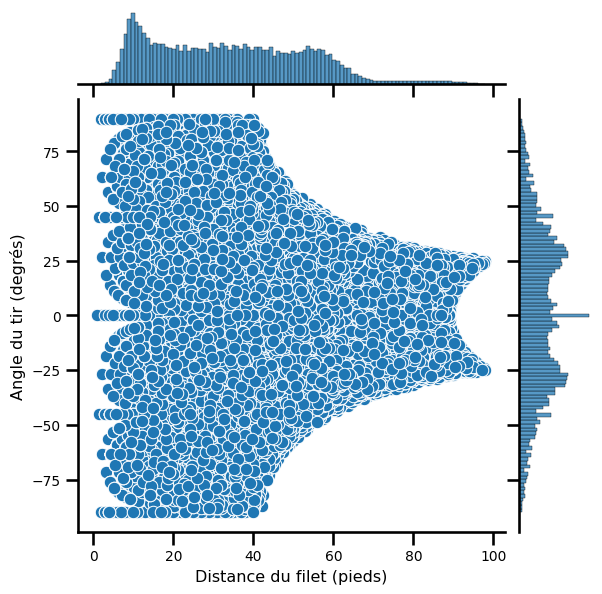

In [11]:
visualisation.hist_2d_shots(data=data2, x='distance_goal', y='angle_goal', hue=None, save=True)